# API Details : GET sensor/data/raw.json

## Resource URL

http://uoweb1.ncl.ac.uk/api/v1/sensor/data/raw.json

# Parameters


## api_key
required
Example Values asdhjkfsadk21479321jkasdkj312489fdsjkl
key: b1h1fn0x2uhdqjdq3ecv6s1znlhezpr79lfdvxgbixe25wj73ftd14jwaivqe0gkp9oqjme586t5xr7hqn4aovqkjb

## sensor_name
required
Example Values section10372

## start_time
required
 
Specifies the start time for a time slice selection. Can be either a date of a datetime and takes the format YYYYMMDDhhmmss or YYYYMMDD.

Example Values 20150101

## end_time
required

Specifies the end time for a time slice selection. Can be either a date of a datetime and takes the format YYYYMMDDhhmmss or YYYYMMDD.

Example Values 20150102

## variable
optional

Specifies the variable of the data return. can take several variables separated by'-and-'

In [ ]:
# Get json request for raw temperature data

# Import package
import requests
import json

# Assign URL to variable: url
url = 'http://uoweb1.ncl.ac.uk/api/v1/sensor/data/raw.json'

parameters = {"api_key": 'b1h1fn0x2uhdqjdq3ecv6s1znlhezpr79lfdvxgbixe25wj73ftd14jwaivqe0gkp9oqjme586t5xr7hqn4aovqkjb','sensor_name':'IGATGATE2','start_time':'20170101','end_time':'20170201','variable':'Temperature'}
# Package the request, send the request and catch the response: response
response=requests.get(url, params=parameters)

print(response.status_code)
print(response.content)

# Decode the JSON data into a dictionary: json_data
json_data=response.json()

print(json_data)
# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

# API Details : GET sensors/live.json

## Resource URL

http://uoweb1.ncl.ac.uk/api/v1/sensors/live.json

# Parameters

## api_key
required

Example Values asdhjkfsadk21479321jkasdkj312489fdsjkl
az8t86q9w0tyxi87wjtn7d5sd2owhk6fzqch4d310unpajr1ytrqhtl6u7r7a1wlvebihwuiwx52u7acataz48m41u

Email Address davidc@balticmill.com

Institute/Company/Own Interest BALTIC_Centre_for_Contemporary_Art

## last_record
optional
 
Specifies the cut off point at which a sensors latest reading must have been. Can be either a date of a datetime and takes the format YYYYMMDDhhmmss or YYYYMMDD.

Example Values 20110101

## variable
optional

Specifies the variable for which a sensor must record. can take several variables separated by'-and-'

Example Values temperature-and-wind

## sensor_type
optional

Specifies the type of sensor. can take several variables separated by'-and-'

Example Values Environmental

## buffer
optional


optional
 
Returns sensors within a given radius of the given latitude/longitude. The parameter value is specified by “latitude,longitude,radius”, where radius units is metres

Example Values -1.61778, 54.97825,500

## bbox
optional

Returns sensors within a given bounding box. The parameter value is specified by “longitude1,latitude1,longitude2,latitude2”

Example Values -1.67683, 54.93409,-1.51959,55.03023


In [ ]:
# Get json request for live temperature data

# Import package
import requests

# Assign URL to variable: url
url = 'http://uoweb1.ncl.ac.uk/api/v1/sensors/live.json'
parameters = {"api_key": 'az8t86q9w0tyxi87wjtn7d5sd2owhk6fzqch4d310unpajr1ytrqhtl6u7r7a1wlvebihwuiwx52u7acataz48m41u','variable' :'Temperature'}
# Package the request, send the request and catch the response: response
response=requests.get(url, params=parameters)

print(response.content)

# Decode the JSON data into a dictionary: json_data
json_data=response.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])


# Temperature and Humidity Plot

Simple plot of Temperature and Humidity from the INETNEWC2 sensor for february 2017 taken from csv file.

All values are indicated in the values column so data has to be filtered by date then variable type.

(60342, 5)


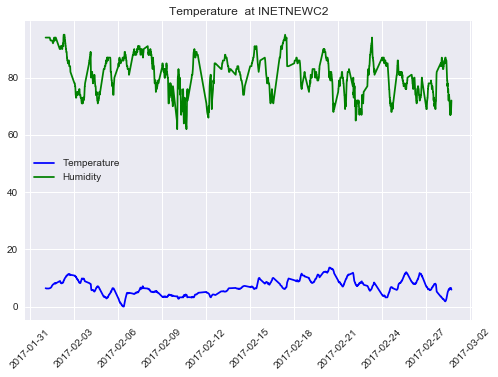

In [9]:
# Newcastle Urban Observatory
# http://uoweb1.ncl.ac.uk/

import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import seaborn as sns
filename='Data/INETNEWC2_2017-01-11_2017-09-29.csv'
weather=pd.read_csv(filename,encoding = "ISO-8859-1", sep=',') 
# print(weather.head())
print(weather.shape)

# Convert Timestamp to datetime and make it the index then slice by month
weather['Timestamp'] = pd.to_datetime(weather['Timestamp'])
weather.index = weather['Timestamp']
weather=weather['2017-02']
# filter value column and plot pressure and Humidity one line
plt.figure(1)
plt.plot((weather[weather.Variable == 'Temperature']['Value']), color='blue',label='Temperature')
# plt.plot((weather[weather.Variable == 'Pressure']['Value']), color='red',label='Pressure')
plt.plot((weather[weather.Variable == 'Humidity']['Value']), color='green',label='Humidity')
plt.title("Temperature  at INETNEWC2")
plt.legend(loc='center left')
plt.xticks(rotation=45)

# Show Plot
plt.savefig('Graphs/temphumtimeslice.png')
plt.show()

# Temperature versus Humidity Plot

In order to plot the temperature versus humidity the data has to be pivoted so as to get temperature and humidity columns.

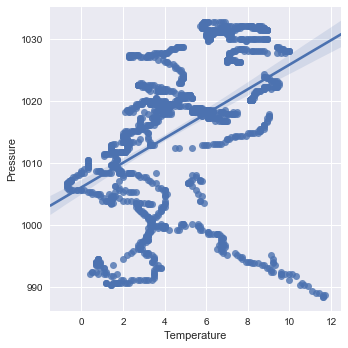

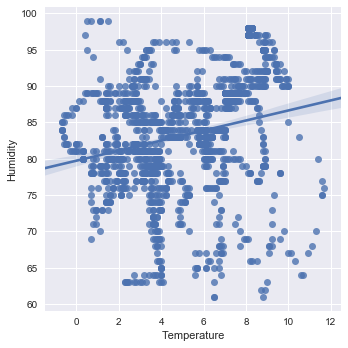

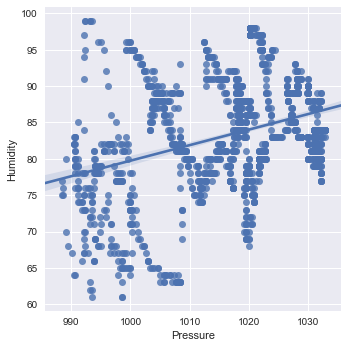

In [21]:
# Newcastle Urban Observatory

import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import seaborn as sns
filename='Data/INETNEWC2_2017-01-11_2017-09-29.csv'
weather=pd.read_csv(filename,encoding = "ISO-8859-1", sep=',') 

weather['Timestamp'] = pd.to_datetime(weather['Timestamp'])
weather.index = weather['Timestamp']
weather=weather['2017-01']

# pivot data
weather_tidy = weather.pivot(index='Timestamp', columns='Variable', values='Value')

plt.figure(1)
sns.lmplot(x= 'Temperature', y='Pressure', data=weather_tidy) 
plt.savefig('Graphs/tempvpressureregression.png')
plt.figure(2)
sns.lmplot(x= 'Temperature', y='Humidity', data=weather_tidy) 
plt.savefig('Graphs/tempvhumidityregression.png')
plt.figure(3)
sns.lmplot(x= 'Pressure', y='Humidity', data=weather_tidy) 
plt.savefig('Graphs/pressurevhumidityregression.png')
plt.show()

# Temperature and Rainfall Plot

(3595, 5)


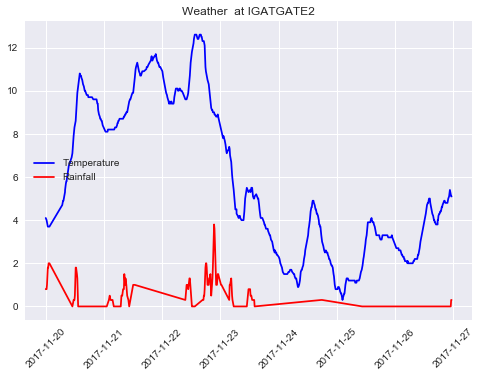

In [11]:
# Newcastle Urban Observatory
# http://uoweb1.ncl.ac.uk/

import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import seaborn as sns
filename='Data/IGATGATE2_20-11-2017_01-01-2017.csv'
weather=pd.read_csv(filename,encoding = "ISO-8859-1", sep=',') 

# print(weather.head())
print(weather.shape)

# Convert Timestamp to datetime and make it the index then slice by month
weather['Timestamp'] = pd.to_datetime(weather['Timestamp'])
weather.index = weather['Timestamp']
weather=weather['2017-11']
# filter value column and plot pressure and Humidity one line
plt.plot((weather[weather.Variable == 'Temperature']['Value']), color='blue',label='Temperature')
plt.plot((weather[weather.Variable == 'Rainfall']['Value']), color='red',label='Rainfall')
# plt.plot((weather[weather.Variable == 'Humidity']['Value']), color='green',label='Humidity')
plt.title("Weather  at IGATGATE2")
plt.legend(loc='center left')
plt.xticks(rotation=45)

# Show Plot
plt.savefig('Graphs/rainfalltimeslice.png')
plt.show()